C:\Users\likit\AppData\Local\Temp\ipykernel_11208\2218484702.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\likit\AppData\Local\Temp\ipykernel_11208\2218484702.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop


Summary Statistics:
       Patient_ID         Age  Blood_Pressure  Cholesterol    Diabetes  \
count  505.000000  505.000000      505.000000   505.000000  505.000000   
mean   249.693069   52.918812      133.328713   200.728713    0.196040   
std    144.240508   21.064700       25.151976    57.374878    0.397392   
min      1.000000   18.000000       90.000000   101.000000    0.000000   
25%    126.000000   34.000000      113.000000   151.000000    0.000000   
50%    249.000000   52.000000      132.000000   207.000000    0.000000   
75%    374.000000   71.000000      153.000000   248.000000    0.000000   
max    500.000000   89.000000      179.000000   299.000000    1.000000   

       Heart_Disease  
count     505.000000  
mean        0.134653  
std         0.341692  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


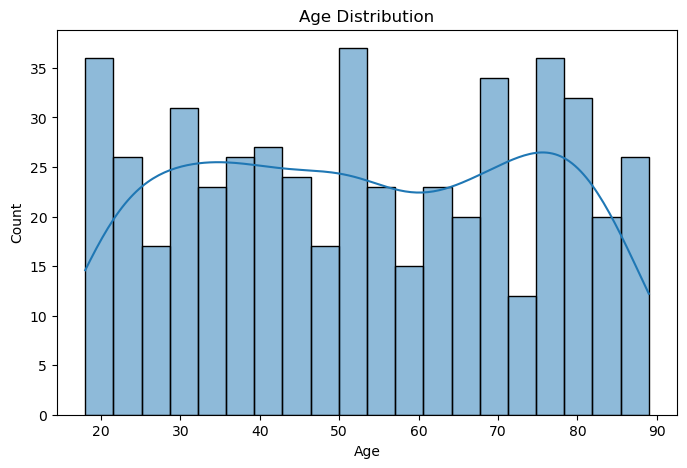

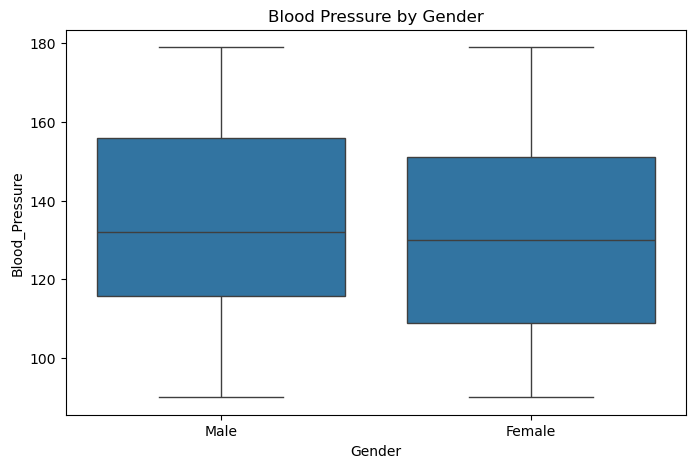

ValueError: could not convert string to float: 'Male'

<Figure size 800x500 with 0 Axes>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Day_15_Healthcare_Data.csv"
df = pd.read_csv(file_path)

# Data Cleaning
# Fill missing gender values with mode if mode exists
if df['Gender'].isnull().sum() > 0:
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Fill missing numerical values with median
if df['Blood_Pressure'].isnull().sum() > 0:
    df['Blood_Pressure'].fillna(df['Blood_Pressure'].median(), inplace=True)
if df['Cholesterol'].isnull().sum() > 0:
    df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)

# Convert categorical columns to numerical format if values match expected mapping
if 'Diabetes' in df.columns:
    df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})
if 'Heart_Disease' in df.columns:
    df['Heart_Disease'] = df['Heart_Disease'].map({'Yes': 1, 'No': 0})

# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualizations
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Blood_Pressure', data=df)
plt.title('Blood Pressure by Gender')
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Save cleaned dataset
df.to_csv("Cleaned_Healthcare_Data.csv", index=False)
print("Cleaned dataset saved as 'Cleaned_Healthcare_Data.csv'")
